In [75]:
# import required libraries for dataframe and visualization
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization

# Import any other libraries you may need
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy.stats import zscore #scale using zscore
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
# when you use 'yellowbrick', you need to install it before (!pip install yellowbrick)
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D

In [76]:
#Function to visualize the clusters using pca https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
def visualize_clusters(data, number_components, number_clusters):
    """
    data: dataframe
    number_components: the number of components to perform principal component analysis
    number of clusters: how many clusters are visualized
    """
    #set data to number_dimensions
    pca=PCA(number_components)

    #transform the data
    pca_df = pca.fit_transform(data)

    #redo kmeans
    kmeans_pca = KMeans(n_clusters=number_clusters)

    #predict labels
    label = kmeans_pca.fit_predict(pca_df)

    #Get unique labels
    u_labels = np.unique(label)

    #Getting the Centroids
    centroids = kmeans_pca.cluster_centers_

    #plotting the results:
 
    titleLabel = "Cluster Plot Kn = "+ str(number_clusters)

    plt.title(titleLabel)
    for i in u_labels:
      plt.scatter(pca_df[label == i , 0] , pca_df[label == i , 1] , label = i)
      plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
  
    plt.legend()
    plt.show()


In [77]:
# Loading csv file from: /kaggle.com/datasets/vatsalmavani/spotify-dataset/data.csv
df = pd.read_csv("C:/Users/Miki.AsusVivobook/project2/data.csv")

# Quick Analysis & Visualization of the dataset

In [78]:
# Use the head function to observe the first five lines of the dataframe
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

<AxesSubplot:>

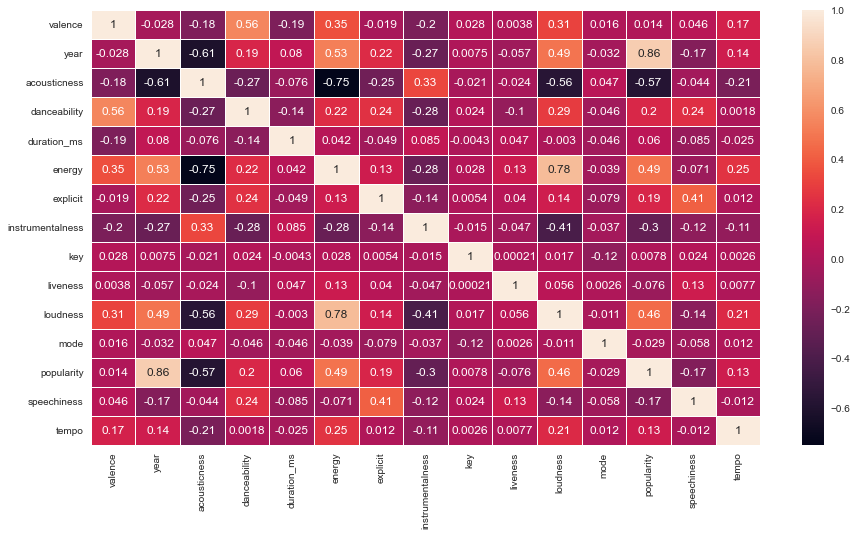

In [7]:
# show the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(data=df.corr(), annot=True, linewidth=.5) 
# strong correlation popularity x year, loudness x energy, valence x danceability

array([[<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'explicit'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>]],
      dtype=object)

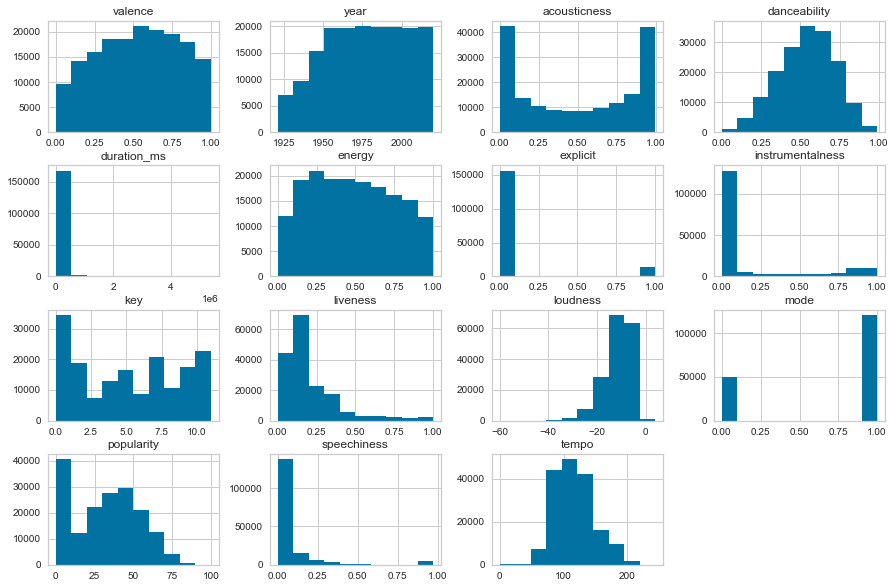

In [8]:
# hist()
df.hist(figsize=(15,10))

In [10]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. The value ranges from 0 to 1. Higher the value more suitable the song is for dancing.

Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Higher the value more energetic the song.

Key: Key is the pitch, notes or scale of song that forms the basis of a song. 12 keys are ranging from 0 to 11.

Loudness: Loudness values are averaged across the entire track. It is the quality of a song. It ranges from -60 to 4 DB. Higher the value, the louder the song.

Mode: Songs can be classified as major and minor. 1.0 represents major mode and 0 represents minor.

Popularity: The Spotify Popularity Index is a 0-to-100 score that ranks how popular an artist is relative to other artists on Spotify.

Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value.

Tempo: The tempo of the song. The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.

https://medium.com/analytics-vidhya/spotify-music-data-analysis-part-3-9097829df16e
https://www.loudlab.org/blog/spotify-popularity-leverage-algorithm/

In [11]:
# describe some object data
df["artists"].describe()

count                   170653
unique                   34088
top       ['Эрнест Хемингуэй']
freq                      1211
Name: artists, dtype: object

In [12]:
# describe some object data
df["name"].describe()

count              170653
unique             133638
top       White Christmas
freq                   73
Name: name, dtype: object

In [65]:
# describe some object data
df["id"].describe()

count                     170653
unique                    170653
top       4BJqT0PrAfrxzMOxytFOIz
freq                           1
Name: id, dtype: object

In [66]:
# describe some object data
df["release_date"].describe()

count     170653
unique     11244
top         1945
freq        1446
Name: release_date, dtype: object

We know now our dataset looks like with 170,653 songs, of aprox. 34,000 artists, from year 1921 to 2020. Let's create KMeans Model with relevant features.

# Preparation & Cleaning for KMeans Clustering Model

In [79]:
# create a copy of the dataset
df1 = df.copy()
df1 = df1.iloc[:170653]

# write to a csv file
df1.to_csv('df1.csv', index=0)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [80]:
# create X without 'year', 'artists', 'duration_ms', 'explicit', 'id' 'key', 'mode', 'name', and 'release_date'
# (those are objects or no contribution features)
X = pd.DataFrame(df1.iloc[:, [0,2,4,6,9,11,12,15,17,18]].values)
col = df1.iloc[:, [0,2,4,6,9,11,12,15,17,18]].columns
X.columns = col
X.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo
0,0.0594,0.982,0.279,0.211,0.878000,0.665,-20.096,4.0,0.0366,80.954
1,0.9630,0.732,0.819,0.341,0.000000,0.160,-12.441,5.0,0.4150,60.936
2,0.0394,0.961,0.328,0.166,0.913000,0.101,-14.850,5.0,0.0339,110.339
3,0.1650,0.967,0.275,0.309,0.000028,0.381,-9.316,3.0,0.0354,100.109
4,0.2530,0.957,0.418,0.193,0.000002,0.229,-10.096,2.0,0.0380,101.665


In [81]:
X.shape

(170653, 10)

In [82]:
# preprocessing (Transform features by scaling each feature to a given range.)
scaler = StandardScaler()

scaled1 = pd.DataFrame(scaler.fit_transform(X))
scaled1.columns = col
scaled1.head(10)

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo
0,-1.782825,1.276187,-1.467013,-1.013988,2.268102,2.626719,-1.514237,-1.256808,-0.379706,-1.169307
1,1.650688,0.611347,1.598779,-0.528270,-0.532771,-0.262229,-0.170766,-1.210993,1.945481,-1.821180
2,-1.858821,1.220340,-1.188820,-1.182122,2.379754,-0.599749,-0.593551,-1.210993,-0.396297,-0.212404
3,-1.381564,1.236296,-1.489722,-0.647832,-0.532682,1.002043,0.377680,-1.302624,-0.387080,-0.545537
4,-1.047180,1.209703,-0.677855,-1.081242,-0.532765,0.132499,0.240788,-1.348440,-0.371104,-0.494867
5,-1.263770,0.204465,0.906137,-0.509589,0.003159,-0.433849,-0.182173,-1.165177,-0.174471,0.096469
6,-0.465809,1.313418,-0.110116,-1.043879,-0.532771,-0.519660,0.154265,-1.256808,-0.226701,-1.649077
7,-1.730767,1.305440,-0.842500,-1.473552,1.148391,0.899071,-1.688862,-1.348440,-0.324403,-0.781368
8,0.731133,1.313418,-0.297470,-1.316628,-0.051072,-0.582587,-1.762046,-1.440072,-0.307812,-1.699324
9,0.921124,1.276187,0.832331,-0.842119,-0.532771,1.705688,-0.868212,-1.440072,1.847164,-0.243698


In [83]:
# Use apply(zscore) to make sure that X3(with StandardScaler()) and zscore are the same.
X_scaled_z =X.apply(zscore)
X_scaled_z.head(10)

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo
0,-1.782825,1.276187,-1.467013,-1.013988,2.268102,2.626719,-1.514237,-1.256808,-0.379706,-1.169307
1,1.650688,0.611347,1.598779,-0.528270,-0.532771,-0.262229,-0.170766,-1.210993,1.945481,-1.821180
2,-1.858821,1.220340,-1.188820,-1.182122,2.379754,-0.599749,-0.593551,-1.210993,-0.396297,-0.212404
3,-1.381564,1.236296,-1.489722,-0.647832,-0.532682,1.002043,0.377680,-1.302624,-0.387080,-0.545537
4,-1.047180,1.209703,-0.677855,-1.081242,-0.532765,0.132499,0.240788,-1.348440,-0.371104,-0.494867
5,-1.263770,0.204465,0.906137,-0.509589,0.003159,-0.433849,-0.182173,-1.165177,-0.174471,0.096469
6,-0.465809,1.313418,-0.110116,-1.043879,-0.532771,-0.519660,0.154265,-1.256808,-0.226701,-1.649077
7,-1.730767,1.305440,-0.842500,-1.473552,1.148391,0.899071,-1.688862,-1.348440,-0.324403,-0.781368
8,0.731133,1.313418,-0.297470,-1.316628,-0.051072,-0.582587,-1.762046,-1.440072,-0.307812,-1.699324
9,0.921124,1.276187,0.832331,-0.842119,-0.532771,1.705688,-0.868212,-1.440072,1.847164,-0.243698


In [84]:
scaled1 = scaler.fit_transform(X)

Elbow Method

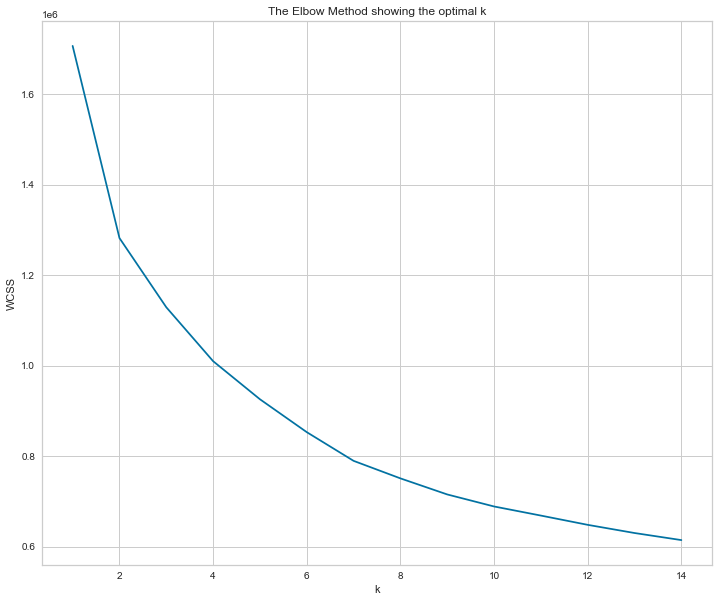

In [85]:
# Elbow method WCSS (Within-Cluster Sum of Square)
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,10))
plt.plot(range(1,15), wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

silhouette score

For n_clusters = 2, the average silhouette score is 0.24305032059797552)
For n_clusters = 3, the average silhouette score is 0.20085402293335997)
For n_clusters = 4, the average silhouette score is 0.21442700916293742)
For n_clusters = 5, the average silhouette score is 0.17529893017828305)
For n_clusters = 6, the average silhouette score is 0.17961648686573617)
For n_clusters = 7, the average silhouette score is 0.17487249452282028)
For n_clusters = 8, the average silhouette score is 0.172759452361698)
For n_clusters = 9, the average silhouette score is 0.16744100966235692)


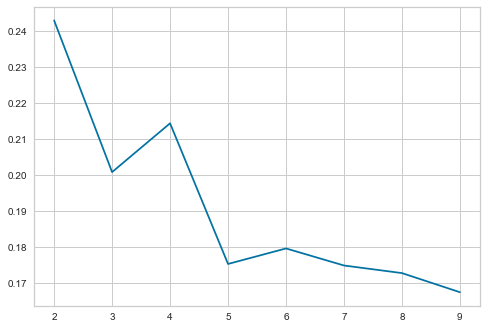

In [20]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((scaled1))
    
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled1, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the average silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show() # It took more than 1 hour

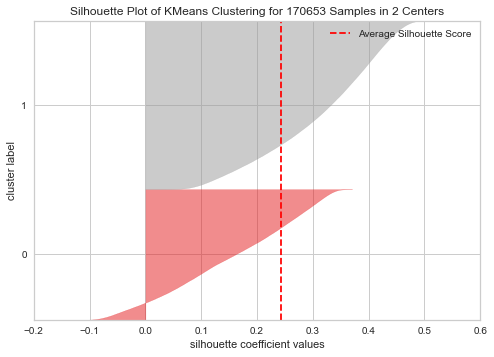

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 170653 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
# finding optimal no. of clusters with silhouette coefficients k=2
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(scaled1)
visualizer.show()

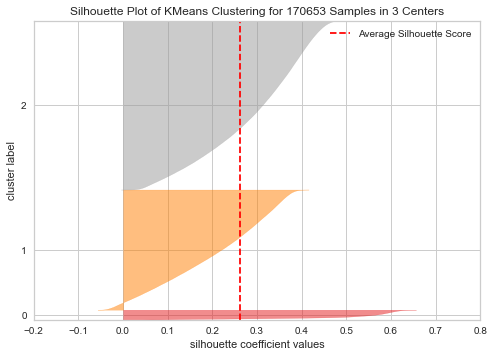

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 170653 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
# finding optimal no. of clusters with silhouette coefficients k=3
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(scaled1)
visualizer.show()

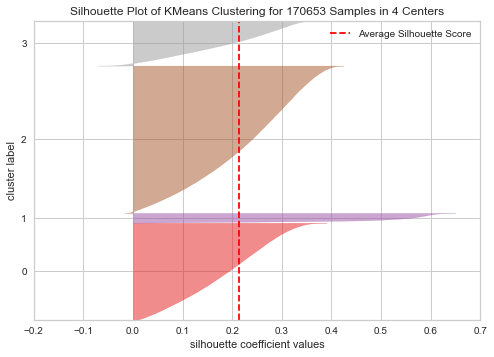

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 170653 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
# finding optimal no. of clusters with silhouette coefficients k=4
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(scaled1)
visualizer.show()

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
From the results of elbow method and silhouette score & plot, we decided to create KMeans Cluster with k=4.

In [86]:
k4_df1 = df1.copy()
scaled_k4_df1 = scaled1.copy()

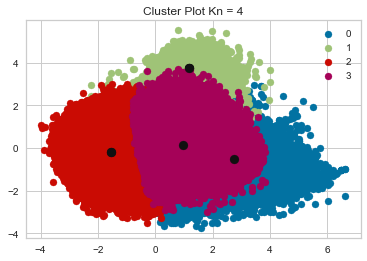

In [87]:
#Function to visualize the clusters using pca
#PCA is done inside the visualize_clusters function (Refer to the section FUNCTIONS
#to see how this was implemented)

visualize_clusters(scaled_k4_df1, 10, 4)

Now, let's investigate more in detail what kind of music each cluster has. First, we concatenate the cluster's numbers to the original dataframe (df1).

before pca
km = KMeans(n_clusters = 4, random_state = 1)
y_km = km.fit_predict(scaled_k4_df1)
clusters = km.cluster_centers_
km.cluster_centers_

In [33]:
# make df with y_km
kmeans_df1 = pd.DataFrame(data=y_km, dtype=int)
kmeans_df1.columns = ['cluster_index']

kmeans_df1.shape

(170653, 1)

In [34]:
kmeans_df1.head(10)

,cluster_index
0,3
1,0
2,3
3,0
4,0
5,0
6,0
7,3
8,0
9,0


In [35]:
# count numbers of the cluster_index
kmeans_df1['cluster_index'].value_counts()

2    84097
0    55381
3    25553
1     5622
Name: cluster_index, dtype: int64

In [36]:
# concatenate the cluster_index column to the dataframe (df1)
df1 = pd.concat([df1, kmeans_df1], axis = 1)

df1.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_index
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,3
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,3
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0


In [37]:
# 10 examples of the songs in the cluster_index 0 (cluster 1 blue)
df1.loc[df1['cluster_index'] == 0][: 10]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_index
1,0.963,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0
3,0.165,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.253,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0
5,0.196,1921,0.579,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.346,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.130,-12.506,1,Gati Mardika,6,1921,0.0700,119.824,0
6,0.406,1921,0.996,['John McCormack'],0.518,159507,0.203,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.115,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221,0
8,0.721,1921,0.996,['Ignacio Corsini'],0.485,161520,0.130,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.104,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678,0
9,0.771,1921,0.982,['Fortugé'],0.684,196560,0.257,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.504,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378,0
10,0.826,1921,0.995,['Maurice Chevalier'],0.463,147133,0.260,0,0BMkRpQtDoKjcgzCpnqLNa,0.000000,9,0.258,-16.894,1,Dans La Vie Faut Pas S'en Faire,0,1921,0.0557,85.146,0
12,0.493,1921,0.990,['Georgel'],0.315,190800,0.363,0,0H3k2CvJvHULnWChlbeFgx,0.000000,5,0.292,-12.562,0,La Vipère,0,1921,0.0546,174.532,0
16,0.218,1921,0.957,['Phil Regan'],0.259,186467,0.212,0,0Nk5f07H3JaEunGrYfbqHM,0.000222,2,0.236,-13.300,1,Come Back To Erin,1,1921,0.0358,85.726,0


In [38]:
# 10 examples of the songs in the cluster_index 1 (cluster 2 green)
df1.loc[df1['cluster_index'] == 1][: 10]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_index
209,0.528,1922,0.980,['Ignacio Corsini'],0.422,179813,0.561,0,5wfVO3v2ZiWmQvJuRgJANe,0.000003,5,0.966,-18.573,0,Monigote - Remasterizado,0,1922-03-21,0.461,121.542,1
255,0.751,1923,0.971,['Louis Armstrong & His Hot Seven'],0.745,192027,0.396,0,1L0puqUCoINHyHjzzWXrHC,0.001790,0,0.238,-10.570,1,A Monday Date,8,1923,0.481,117.753,1
327,0.803,1923,0.991,['Edmée Favart'],0.783,141040,0.341,0,1C24gb2rQwSd262BP09DNB,0.000000,2,0.589,-14.903,1,Chanson De Route De Ciboulette,0,1923,0.873,121.287,1
367,0.706,1923,0.976,['Georgius'],0.613,182440,0.457,0,4qCTrMjyVYDIGVKSGbuBNF,0.000000,7,0.192,-15.501,1,Il N'osait Pas Se Decider,0,1923,0.510,76.682,1
672,0.685,1925,0.845,['Tommy Dorsey'],0.536,191173,0.494,0,1MF2r88Wbv0G4I2WXwuizw,0.009820,7,0.938,-11.520,0,Rhumboogie,2,1925,0.472,180.142,1
692,0.806,1925,0.969,"['Tommy Dorsey', 'Elvis Presley']",0.521,180813,0.539,0,5OhEHB9YEo9ZQxYQaC2rcC,0.000575,4,0.946,-9.161,1,Heartbreak Hotel,3,1925,0.508,93.412,1
705,0.638,1925,0.979,['Tommy Dorsey & His Clambake Seven'],0.751,222133,0.378,0,7aXtdan5Jnpxd8FM5AmkUs,0.000001,4,0.759,-9.972,1,There's Good Blues Tonight,2,1925,0.462,128.665,1
723,0.550,1925,0.987,['Ignacio Corsini'],0.469,166147,0.436,0,0iAhqFWOm8rBNLVbJpqj31,0.027600,11,0.917,-17.742,1,La Carrera - Remasterizado,0,1925-04-25,0.446,75.081,1
768,0.784,1925,0.994,['Ignacio Corsini'],0.530,179827,0.255,0,2wc9bV6XI32NNMSjlKvOTD,0.438000,6,0.857,-20.043,0,Los Carreteros - Remasterizado,0,1925-04-25,0.478,67.319,1
796,0.822,1925,0.969,['Maurice Chevalier'],0.705,158493,0.213,0,45OfpkoaAJTQhuJDy8zXND,0.000000,2,0.228,-16.042,1,Je Ne Dis Pas Non,0,1925,0.558,98.080,1


In [39]:
# 10 examples of the songs in the cluster_index 2 (cluster 3 red)
df1.loc[df1['cluster_index'] == 2][: 10]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_index
14,0.493,1921,0.017500,['Zay Gatsby'],0.527,205072,0.691,1,0MJZ4hh60zwsYleWWxT5yW,0.384000,7,0.3580,-7.298,1,Power Is Power,0,1921-03-27,0.0326,159.935,2
27,0.723,1921,0.388000,['Mehmet Kemiksiz'],0.685,155063,0.698,0,0osXBirvQzPRfKSUDzHPCv,0.000002,4,0.0768,-8.184,0,Korkma Sönmez,0,1921,0.0421,133.951,2
130,0.640,1921,0.167000,['Mehmet Kemiksiz'],0.623,244898,0.655,0,6lwygJ9iQV6NNOQh1Gn3Gb,0.004180,1,0.0891,-7.540,0,Baksana Kim Boynu Bükük Ağlayan,0,1921,0.0425,126.859,2
386,0.770,1923,0.000065,['Macarti'],0.788,414749,0.898,0,5wBkFVpjJiuRi8ZomCngAU,0.843000,6,0.0393,-9.377,1,Beis Ep,0,1923-02-06,0.0704,125.031,2
477,0.745,1924,0.821000,['Lionel Hampton Orchestra'],0.589,500787,0.895,0,1JKGMzesB5AMCp9Yuqbcjj,0.675000,10,0.5930,-4.295,1,I Got Rhythm,0,1924,0.1030,141.475,2
523,0.453,1924,0.002620,['Lionel Hampton Orchestra'],0.478,449480,0.601,0,39hHy2RE5bbkjweHBOwyi7,0.012500,7,0.4130,-15.063,1,Mr. John,0,1924,0.0434,140.472,2
536,0.436,1924,0.012600,['Lionel Hampton Orchestra'],0.387,644027,0.715,0,3sRZN0JyaVNLH33y7n1ioN,0.623000,7,0.2270,-13.200,1,Flying Home,0,1924,0.1180,129.754,2
582,0.840,1924,0.919000,['Lionel Hampton Orchestra'],0.742,192680,0.805,0,5hGmr6KQWzcCGdTYxf4P4S,0.578000,1,0.2590,-5.123,1,Stompin' at the Savoy - Mix One,0,1924,0.0360,112.840,2
724,0.162,1925,0.314000,['Old Grape God'],0.678,822857,0.835,0,0lATdfQAizjfZqZdTdcbGp,0.004410,0,0.1480,-11.909,1,Hella Often Freestyle,0,1925-11-12,0.2640,140.005,2
844,0.487,1926,0.007460,['Future Rapper'],0.797,81000,0.516,0,0YFDGOIR9ubDqWCvsUQKY0,0.229000,11,0.0972,-12.679,0,HF V CMV.Iii,7,1926-10-03,0.2520,151.114,2


In [40]:
# 10 examples of the songs in the cluster_index 3 (cluster 4 pink)
df1.loc[df1['cluster_index'] == 3][: 10]

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_index
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.2110,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,3
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.1660,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,3
7,0.0731,1921,0.993,['Sergei Rachmaninoff'],0.389,218773,0.0880,0,02GDntOXexBFUvSgaXLPkd,0.527,1,0.363,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867,3
11,0.5780,1921,0.994,['Ignacio Corsini'],0.378,155413,0.1150,0,0F30WM8qRpO8kdolepZqdM,0.906,10,0.110,-27.039,0,Por Que Me Dejaste - Remasterizado,0,1921-03-20,0.0414,70.370,3
13,0.2120,1921,0.912,['Mehmet Kemiksiz'],0.415,184973,0.4200,0,0LcXzABeA84EgudqpNUN1I,0.890,8,0.108,-10.766,0,Ud Taksimi,0,1921,0.1140,70.758,3
15,0.2820,1921,0.989,"['Sergei Rachmaninoff', 'Ruth Laredo']",0.384,221013,0.1710,0,0NFeJgmTAV1kDfzSQNK41Z,0.820,7,0.116,-20.476,0,"10 Préludes, Op. 23: No. 5 in G Minor. Alla ma...",4,1921,0.0319,107.698,3
17,0.6640,1921,0.996,"['Hector Berlioz', 'Arturo Toscanini']",0.541,250747,0.2830,0,0POO8XaUgW5Qjbv9sbDy8W,0.898,9,0.393,-14.808,1,Rákóczy March,0,1921,0.0477,108.986,3
22,0.4220,1921,0.995,['Ignacio Corsini'],0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.112,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,3
23,0.3810,1921,0.995,['Hanende İbrahim Efendi'],0.223,158908,0.2450,0,0UqiUmGDlhL0A0pmLxafn4,0.876,7,0.354,-14.387,1,İmtidadı Aşkıma,0,1921-12-18,0.0387,142.136,3
24,0.4100,1921,0.970,['Mehmet Kemiksiz'],0.269,86988,0.1430,0,0VhIFYGSpY0Z8IAIA3C6bX,0.469,4,0.166,-9.003,1,Ney Taksimi,0,1921,0.0413,141.386,3


In [41]:
# create a copy dataframe
cluster4_df = df1.copy()
cluster4_df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_index
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,3
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,0
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,3
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,0
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,0


In [42]:
cluster4_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

<IPython.core.display.Javascript object>


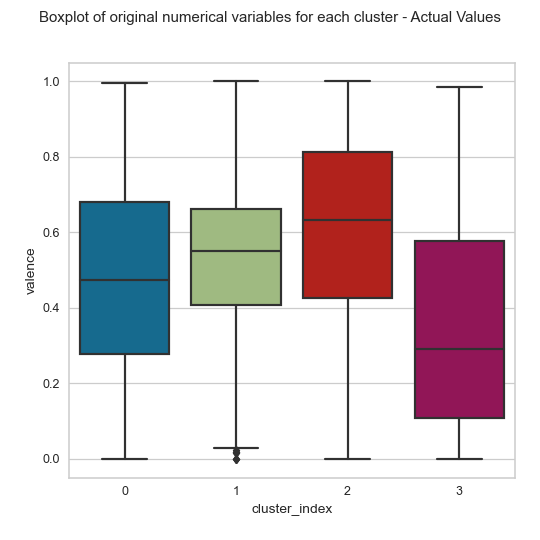

In [44]:
#visualize the boxplots for each segment for each feature for the data represented
#with actual values.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=12)

sns.boxplot(data=cluster4_df, x="cluster_index", y="valence")

fig.tight_layout(pad=2.0)

<IPython.core.display.Javascript object>


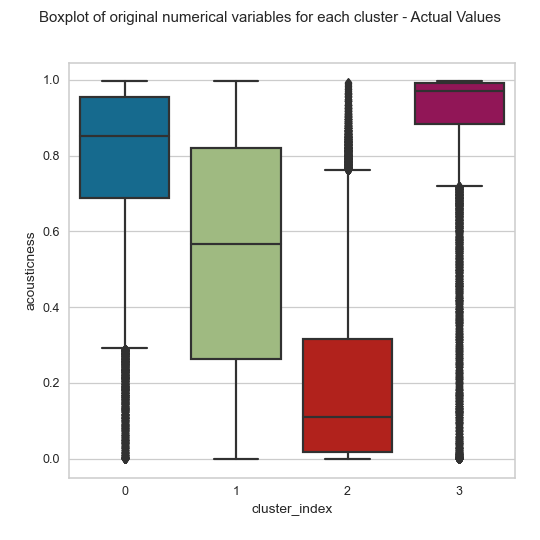

In [45]:
#visualize the boxplots for each segment for each feature for the data represented
#with actual values.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=12)

sns.boxplot(data=cluster4_df, x="cluster_index", y="acousticness")

fig.tight_layout(pad=2.0)

<IPython.core.display.Javascript object>


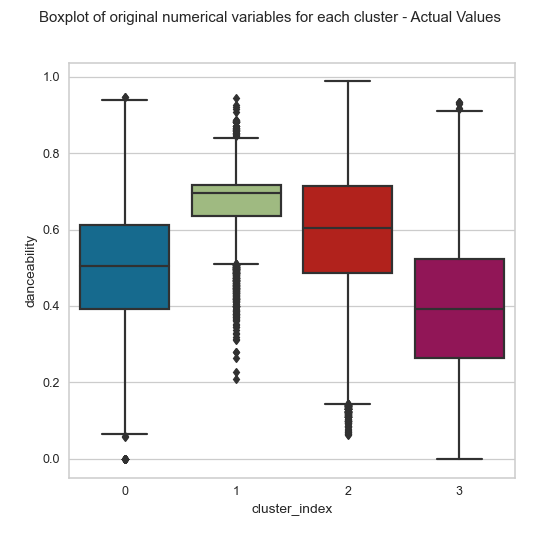

In [46]:
#visualize the boxplots for each segment for each feature for the data represented
#with actual values.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=12)

sns.boxplot(data=cluster4_df, x="cluster_index", y="danceability")

fig.tight_layout(pad=2.0)

<IPython.core.display.Javascript object>


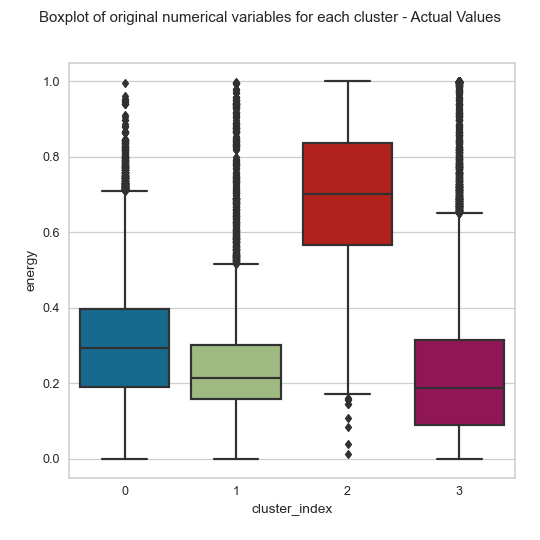

In [47]:
#visualize the boxplots for each segment for each feature for the data represented
#with actual values.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=12)

sns.boxplot(data=cluster4_df, x="cluster_index", y="energy")

fig.tight_layout(pad=2.0)

<IPython.core.display.Javascript object>


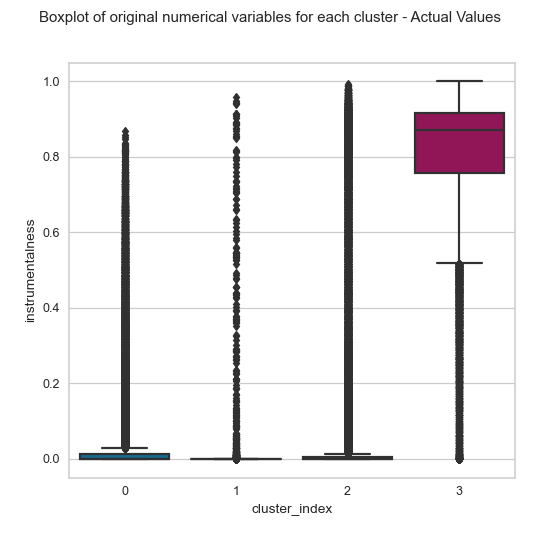

In [48]:
#visualize the boxplots for each segment for each feature for the data represented
#with actual values.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=12)

sns.boxplot(data=cluster4_df, x="cluster_index", y="instrumentalness")

fig.tight_layout(pad=2.0)

<IPython.core.display.Javascript object>


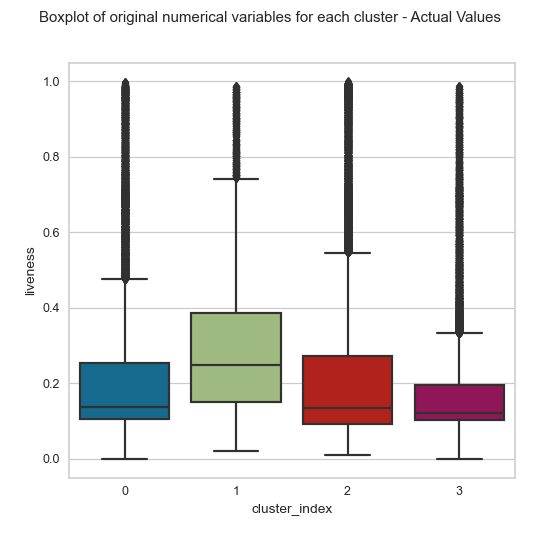

In [49]:
#visualize the boxplots for each segment for each feature for the data represented
#with actual values.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=12)

sns.boxplot(data=cluster4_df, x="cluster_index", y="liveness")

fig.tight_layout(pad=2.0)

<IPython.core.display.Javascript object>


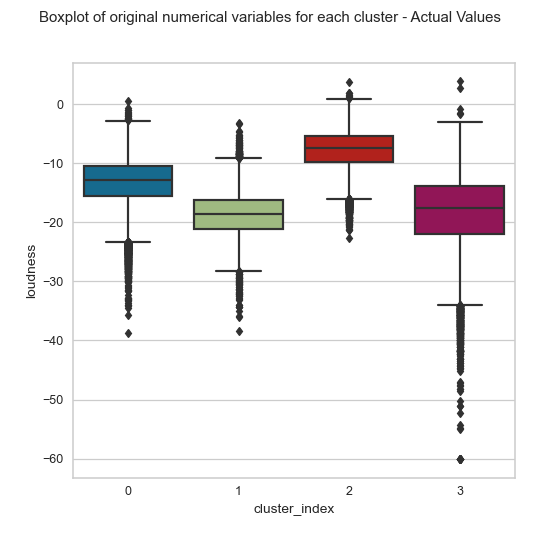

In [50]:
#visualize the boxplots for each segment for each feature for the data represented
#with actual values.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=12)

sns.boxplot(data=cluster4_df, x="cluster_index", y="loudness")

fig.tight_layout(pad=2.0)

<IPython.core.display.Javascript object>


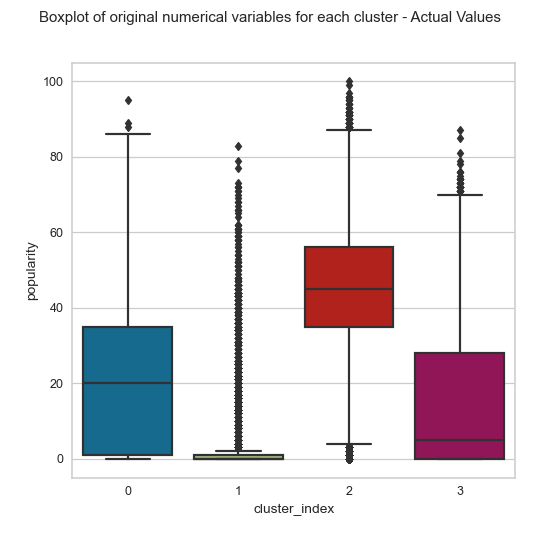

In [51]:
#visualize the boxplots for each segment for each feature for the data represented
#with actual values.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=12)

sns.boxplot(data=cluster4_df, x="cluster_index", y="popularity")

fig.tight_layout(pad=2.0)

<IPython.core.display.Javascript object>


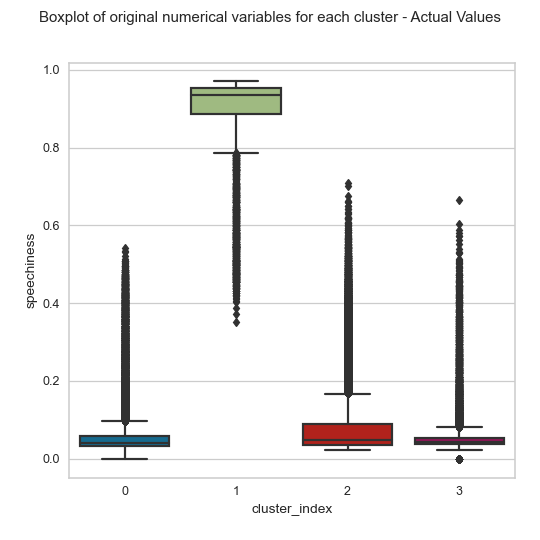

In [52]:
#visualize the boxplots for each segment for each feature for the data represented
#with actual values.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=12)

sns.boxplot(data=cluster4_df, x="cluster_index", y="speechiness")

fig.tight_layout(pad=2.0)

<IPython.core.display.Javascript object>


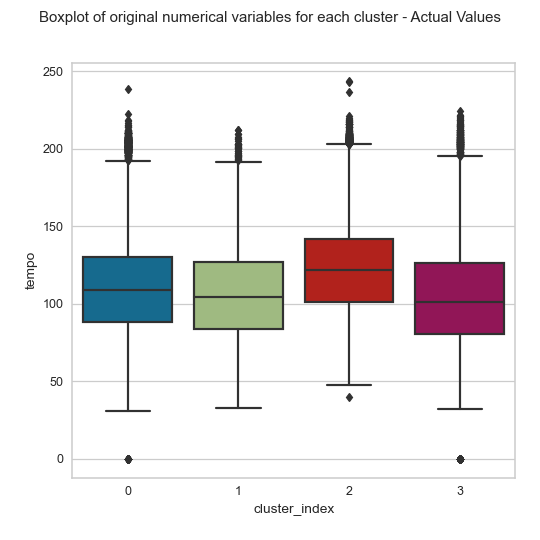

In [53]:
#visualize the boxplots for each segment for each feature for the data represented
#with actual values.
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster - Actual Values", fontsize=12)

sns.boxplot(data=cluster4_df, x="cluster_index", y="tempo")

fig.tight_layout(pad=2.0)

Analysis1 - Characters (teste) of the music -
Blue Cluster: (high) acousticness, valence (low) speechiness --- Acoustic Music?
Green Cluster: (high) speechiness (low) instrumentalness --- spoken? Rap?
Red Cluster: (high) energy, loudness (low) acousticness --- Energy, Rock?
Pink Cluster: (high) instrumentalness, acousticness (low) speechiness --- Instrumental Music?

Analysis2 - clustering - 
Well separated --- acousticness(1,2,3), danceability(0,2,3), instrumentalness, energy(0,2,3), loudness(0,1,2), speechiness 
Overlapped --- liveness, tempo

In [60]:
# TOP 10 songs in the cluster_index 0 (blue cluster) sorted by popularity
df1.loc[df1['cluster_index'] == 0].sort_values('popularity', ascending=False).head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_index
19620,0.0927,2020,0.864,"['Justin Bieber', 'benny blanco']",0.631,149297,0.239,1,4y4spB9m0Q6026KfkAvy9Q,0.000000,11,0.1160,-7.071,0,Lonely (with benny blanco),95,2020-10-16,0.0398,79.859,0
19210,0.1200,2018,0.934,"['Billie Eilish', 'Khalid']",0.351,200186,0.296,0,0u2P5u6lvoDfwTYjAADbn4,0.000000,4,0.0950,-10.109,0,lovely (with Khalid),89,2018-04-19,0.0333,115.284,0
19421,0.0592,2019,0.839,['Harry Styles'],0.567,240133,0.267,0,1ZMiCix7XSAbfAJlEZWMCp,0.000001,4,0.0890,-6.502,1,Falling,88,2019-12-13,0.0299,110.011,0
18208,0.3310,2013,0.922,['John Legend'],0.422,269560,0.264,0,3U4isOIWM3VvDubwSI3y7a,0.000000,8,0.1320,-7.064,1,All of Me,86,2013-08-30,0.0322,119.930,0
19433,0.1980,2019,0.978,['Billie Eilish'],0.367,196077,0.111,0,43zdsphuZLzwA9k4DJhU0I,0.000040,4,0.0897,-14.084,1,when the party's over,86,2019-03-29,0.0972,82.642,0
19709,0.0875,2020,0.795,['Billie Eilish'],0.444,208155,0.309,0,2ygvZOXrIeVL4xZmAWJT2C,0.132000,8,0.3520,-10.956,1,my future,85,2020-07-30,0.0620,104.745,0
19230,0.0895,2018,0.720,"['Kina', 'Snøw']",0.498,179080,0.235,0,4ZLzoOkj0MPWrTLvooIuaa,0.000000,1,0.1440,-16.541,0,Get You The Moon (feat. Snøw),85,2018-10-08,0.1880,118.917,0
19226,0.5200,2018,0.883,['XXXTENTACION'],0.669,121887,0.308,0,7AFASza1mXqntmGtbxXprO,0.000000,11,0.0984,-10.068,1,changes,85,2018-03-16,0.0290,64.934,0
19679,0.3220,2020,0.868,['Noah Cyrus'],0.708,156106,0.186,0,6J2LdBN97cDWn0MLxYh9HB,0.000000,9,0.0779,-8.953,0,July,85,2020-05-15,0.0420,72.541,0
19461,0.1200,2019,0.952,['Billie Eilish'],0.421,291796,0.131,0,6CcJMwBtXByIz4zQLzFkKc,0.004530,0,0.1090,-18.435,1,i love you,83,2019-03-29,0.0382,137.446,0


In [61]:
# TOP 10 songs in the cluster_index 1 (green cluster) sorted by popularity
df1.loc[df1['cluster_index'] == 1].sort_values('popularity', ascending=False).head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_index
38440,0.568,2020,0.6080,"['Sista Prod', 'Subvrbs']",0.768,154599,0.339,0,0qUcpOOna3kkrwfqky85e1,0.000956,0,0.2610,-13.169,1,Eyes Blue Like The Atlantic (feat. Subvrbs),83,2020-07-20,0.777,76.229,1
38500,0.544,2020,0.8640,['BTS'],0.703,179548,0.321,0,4GVwjLRT7oSsKby7Vy8EHr,0.000000,4,0.9080,-13.135,1,Skit,79,2020-11-20,0.884,114.822,1
19094,0.383,2017,0.7680,['XXXTENTACION'],0.735,129720,0.197,1,2yZax79pOrYuyIFVW2cZY2,0.000276,3,0.2960,-13.378,0,Carry On,77,2017-08-25,0.537,147.899,1
18659,0.528,2015,0.2720,"['Lin-Manuel Miranda', 'Leslie Odom Jr.', 'Ant...",0.646,156631,0.439,0,6dr7ekfhlbquvsVY8D7gyk,0.000000,7,0.0945,-10.837,1,"Aaron Burr, Sir",73,2015-09-25,0.818,160.387,1
57074,0.628,2019,0.1840,"['Cordae', 'Anderson .Paak']",0.611,175828,0.714,1,5lw8Mgb4LyhriPIC86gV6e,0.000000,9,0.1450,-4.696,0,RNP (feat. Anderson .Paak),72,2019-07-26,0.856,196.043,1
57394,0.600,2020,0.5120,['2KBABY'],0.686,105600,0.362,1,3k0LQivRnB690bkznEXI1E,0.000000,2,0.1680,-12.042,1,Old Streets,72,2020-04-10,0.617,126.700,1
18869,0.551,2016,0.3080,['A Boogie Wit da Hoodie'],0.538,174192,0.520,1,5uZm7EFtP5aoTJvx5gv9Xf,0.000000,7,0.2140,-11.063,0,Jungle,72,2016-09-16,0.737,180.274,1
18971,0.090,2016,0.5130,['NF'],0.536,322587,0.708,0,10bt2wAkFgCWRCEOyAyWT9,0.000000,6,0.0951,-7.882,1,How Could You Leave Us,71,2016-04-22,0.758,78.330,1
38347,0.457,2019,0.3630,['J.I the Prince of N.Y'],0.806,142289,0.368,1,18wBygantQ9hYTzPgpSVTk,0.000000,5,0.1100,-12.745,0,Blame on Me,71,2019-10-11,0.868,81.034,1
18728,0.828,2015,0.0691,"['Anthony Ramos', 'Lin-Manuel Miranda', 'Jon R...",0.887,106646,0.516,0,3lXyAQ0kekAvY5LodpWmUs,0.000000,10,0.6170,-8.187,0,Ten Duel Commandments,70,2015-09-25,0.658,77.977,1


In [62]:
# TOP 10 songs in the cluster_index 2 (red cluster) sorted by popularity
df1.loc[df1['cluster_index'] == 2].sort_values('popularity', ascending=False).head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_index
19611,0.1450,2020,0.40100,"['Bad Bunny', 'Jhay Cortez']",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,Dakiti,100,2020-10-30,0.0544,109.928,2
19606,0.7560,2020,0.22100,"['24kGoldn', 'iann dior']",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),99,2020-07-24,0.0369,90.989,2
19618,0.7370,2020,0.01120,['BTS'],0.746,199054,0.765,0,0t1kP63rueHleOhQkYSXFY,0.000000,6,0.0936,-4.410,0,Dynamite,97,2020-08-28,0.0993,114.044,2
19612,0.5430,2020,0.65000,['Pop Smoke'],0.709,160000,0.548,1,1tkg4EHVoqnhR6iFEXb60y,0.000002,10,0.1330,-8.493,1,What You Know Bout Love,96,2020-07-03,0.3530,83.995,2
19608,0.3570,2020,0.01940,"['Cardi B', 'Megan Thee Stallion']",0.935,187541,0.454,1,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,WAP (feat. Megan Thee Stallion),96,2020-08-07,0.3750,133.073,2
19616,0.3340,2020,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,96,2020-03-20,0.0598,171.005,2
19610,0.6820,2020,0.46800,['Ariana Grande'],0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,2020-10-30,0.0878,144.015,2
19615,0.3720,2020,0.19600,"['Justin Bieber', 'Chance the Rapper']",0.673,212093,0.704,0,5u1n1kITHCxxp8twBcZxWy,0.000000,6,0.0898,-8.056,1,Holy (feat. Chance The Rapper),95,2020-09-18,0.3600,86.919,2
19607,0.3470,2020,0.11400,"['Pop Smoke', 'Lil Baby', 'DaBaby']",0.823,190476,0.586,1,0PvFJmanyNQMseIFrU708S,0.000000,6,0.1930,-6.606,0,For The Night (feat. Lil Baby & DaBaby),95,2020-07-03,0.2000,125.971,2
19623,0.0799,2020,0.78600,['Tate McRae'],0.642,169266,0.374,0,45bE4HXI0AwGZXfZtMp8JR,0.000000,4,0.0906,-9.386,1,you broke me first,95,2020-04-17,0.0545,124.099,2


In [63]:
# TOP 10 songs in the cluster_index 3 (pink cluster) sorted by popularity
df1.loc[df1['cluster_index'] == 3].sort_values('popularity', ascending=False).head(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster_index
19427,0.24300,2019,0.902,['Billie Eilish'],0.704,245426,0.225000,0,3ZCTVFBt2Brf31RLEnCkWJ,0.657,6,0.106,-14.454,0,everything i wanted,87,2019-11-13,0.0994,120.006,3
19030,0.00000,2017,0.791,"['Erik Eriksson', 'White Noise Baby Sleep', 'W...",0.000,90228,0.003420,0,2bRKxuH1o7pTmb1y4GfdEc,1.000,8,0.111,-28.460,1,Clean White Noise - Loopable with no fade,85,2017-01-08,0.0000,0.000,3
19260,0.00000,2018,0.394,['High Altitude Samples'],0.000,160003,0.001480,0,129ldjjvnFfA7Ygc8ktYnh,1.000,5,0.111,-31.839,1,Soft Brown Noise,81,2018-11-15,0.0000,0.000,3
19038,0.00000,2017,0.923,['Granular'],0.000,147097,0.000050,0,65rkHetZXO6DQmBh3C2YtW,0.297,10,0.110,-32.354,0,White Noise - 500 hz,79,2017-10-13,0.0000,0.000,3
19029,0.00000,2017,0.944,['Granular'],0.000,135484,0.000020,0,6H4B9gJD6eQlNoEh8q85pP,0.869,2,0.112,-40.449,0,White Noise - 145 hz,78,2017-10-13,0.0000,0.000,3
38356,0.00000,2019,0.862,['Bruce Brus'],0.000,168000,0.000431,0,3AFEx7f9qxc6U59s27Tp1V,0.977,0,0.162,-14.105,0,White Noise Crashing Waves,76,2019-08-09,0.0000,0.000,3
38415,0.19700,2019,0.920,['Labrinth'],0.563,202536,0.459000,0,6potEImiklXkwD9qFzpu15,0.724,4,0.110,-7.781,0,Forever,76,2019-10-04,0.0292,79.983,3
18222,0.06010,2013,0.788,['salvia palth'],0.529,161463,0.353000,0,7svpAkwc6xaSxlbZ7V7JiS,0.853,7,0.116,-12.835,1,i was all over her,76,2013-01-01,0.0292,104.557,3
19150,0.46200,2017,0.945,['sagun'],0.755,185876,0.062500,0,506O2O13slCAUEo6w8aqr8,0.816,7,0.178,-24.694,1,I'll Keep You Safe,75,2017-10-06,0.0555,114.984,3
75165,0.00001,2020,0.128,['Epic Soundscapes'],0.069,252330,1.000000,0,7rQ1E6bl6UMhrRhf8quVIR,0.944,6,0.953,-14.577,1,Heavy Rain,74,2020-02-23,0.0514,77.220,3


In [94]:
df1.to_csv('df1.csv', index=0)